# Neuron networks from scratch in Python
References: http://103.203.175.90:81/fdScript/RootOfEBooks/E%20Book%20collection%20-%202024%20-%20G/CSE%20%20IT%20AIDS%20ML/Neural%20Network.pdf

In [64]:
import math
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

## Chapter 6: Introducing Optimization

Randomly changing the weights, checking the loss, and repeating this until happy with the lowest loss found

In [65]:
class Loss:
    def calculate(self, y_pred, y):
        return np.mean(self.forward(y_pred, y))

class CrossEntropyLoss(Loss):
    def forward(self, y_pred, y):
        correct_confidences = 0
        y_dim = len(y.shape)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if y_dim == 1:
            correct_confidences = y_pred_clipped[range(len(y_pred_clipped)), y]
        elif y_dim == 2:
            correct_confidences = np.sum(y_pred_clipped * y, axis=1)
        
        return - np.log(correct_confidences)

class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output =  np.dot(inputs, self.weights) + self.biases

class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    
class Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

[]

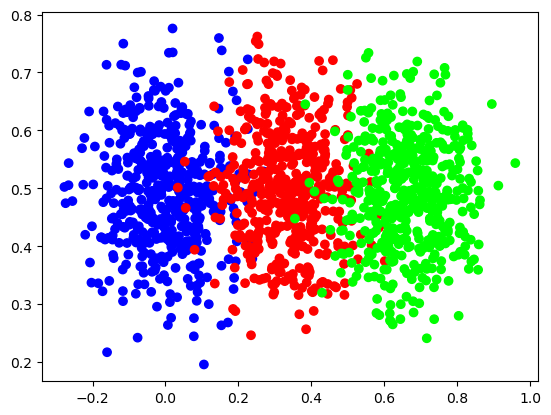

In [66]:
X, y = vertical_data(samples=500, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.plot()

In [67]:
len(y.shape)

1

In [68]:
dense1 = Dense(2, 1000)
activation1 = ReLU()
dense2 = Dense(1000, 3)
activation2 = Softmax()
loss_function = CrossEntropyLoss()

lowest_loss = 999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iter in range(10000):
    dense1.weights = 0.05 * np.random.randn(2, 1000)
    dense1.biases = 0.05 * np.random.randn(1, 1000)
    dense2.weights = 0.05 * np.random.randn(1000, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output, y)

    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
        print(f'Iteration: {iter}, loss: {loss}, acc: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

Iteration: 0, loss: 1.101725697517395, acc: 0.3333333333333333
Iteration: 1, loss: 1.0995968580245972, acc: 0.388
Iteration: 2, loss: 1.0916327238082886, acc: 0.306
Iteration: 5, loss: 1.0886317491531372, acc: 0.4033333333333333
Iteration: 27, loss: 1.0883036851882935, acc: 0.3333333333333333
Iteration: 50, loss: 1.0840671062469482, acc: 0.33866666666666667
Iteration: 176, loss: 1.08281672000885, acc: 0.47733333333333333
Iteration: 195, loss: 1.0820934772491455, acc: 0.346
Iteration: 209, loss: 1.0813995599746704, acc: 0.3333333333333333
Iteration: 461, loss: 1.08018159866333, acc: 0.26266666666666666
Iteration: 573, loss: 1.0767253637313843, acc: 0.5593333333333333
Iteration: 941, loss: 1.0736380815505981, acc: 0.6246666666666667
Iteration: 2130, loss: 1.0720425844192505, acc: 0.3433333333333333
Iteration: 3785, loss: 1.0711307525634766, acc: 0.3333333333333333
Iteration: 6097, loss: 1.0686579942703247, acc: 0.4653333333333333
